In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy
import numpy as np
import matplotlib.pyplot as plt
import os

Extraindo os dados

In [ ]:
from zipfile import ZipFile

data_path = '/content/archive (2).zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()

Organizando a pasta animals em treino e validação

In [ ]:
import shutil
import random


base_dir = '/content/animals'


train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

classes = ['cats', 'dogs', 'panda']
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)


train_split = 0.8


def move_images(class_name):
    class_dir = os.path.join(base_dir, 'animals', class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)


    train_size = int(len(images) * train_split)

    train_images = images[:train_size]
    validation_images = images[train_size:]


    for image in train_images:
        shutil.move(os.path.join(class_dir, image), os.path.join(train_dir, class_name, image))


    for image in validation_images:
        shutil.move(os.path.join(class_dir, image), os.path.join(validation_dir, class_name, image))


for class_name in classes:
    move_images(class_name)


redundant_dirs = ['cats', 'dogs', 'panda']
for dir_name in redundant_dirs:
    shutil.rmtree(os.path.join(base_dir, dir_name))

Aplicando o flow_from_directory para preparar os diretórios dos arquivos para o formato necessário

In [ ]:
# Aplicando metódos de Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/animals/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/content/animals/validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Montando a rede neural convolucional

In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,117,571 (19.52 MB)

 Trainable params: 5,117,571 (19.52 MB)

 Non-trainable params: 0 (0.00 B)

Avaliando o modelo no conjunto de treinamento e validação

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 399s 5s/step - accuracy: 0.3725 - loss: 1.1301 - val_accuracy: 0.5433 - val_loss: 0.9006
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 437s 5s/step - accuracy: 0.5340 - loss: 0.9412 - val_accuracy: 0.5933 - val_loss: 0.8372
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 394s 5s/step - accuracy: 0.5527 - loss: 0.8657 - val_accuracy: 0.6000 - val_loss: 0.7716
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 435s 5s/step - accuracy: 0.5469 - loss: 0.8410 - val_accuracy: 0.5967 - val_loss: 0.7500
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 441s 5s/step - accuracy: 0.5760 - loss: 0.8263 - val_accuracy: 0.6100 - val_loss: 0.8079
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 388s 5s/step - accuracy: 0.5926 - loss: 0.8074 - val_accuracy: 0.6067 - val_loss: 0.7463
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 455s 5s/step - accuracy: 0.6291 - loss: 0.7439 - val_accuracy: 0.5233 - val_loss: 0.9608
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 403s 5s/step - accuracy: 0.6346 - loss: 0.7375 - val_accuracy: 0.6267 - val_loss: 0.

Testando o modelo com as imagens de previsão

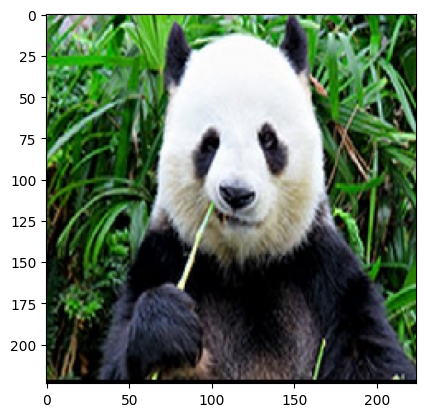

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
A imagem é de um panda


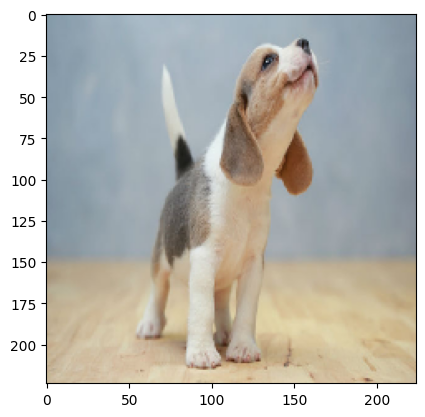

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
A imagem é de um cachorro


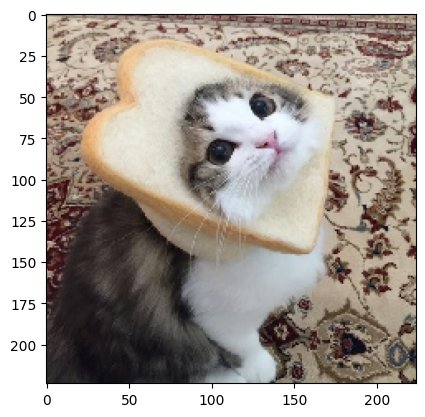

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
A imagem é de um panda


In [ ]:
test_images_path = '/content/animals/images'


# Definindo a função de teste dos modelos
def test_images_with_model(model, test_images_path):
    image_files = os.listdir(test_images_path)


    for img_file in image_files:
        img_path = os.path.join(test_images_path, img_file)
        img = image.load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.show()


        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)


        predicted_class = model.predict(img_array)
        predicted_class = np.argmax(predicted_class)


        if predicted_class == 1:
            print('A imagem é de um cachorro')
        elif predicted_class == 0:
            print('A imagem é de um gato')
        else:
            print('A imagem é de um panda')

test_images_with_model(model, test_images_path)


Utilizando uma rede pré treinada e avaliando no conjunto de imagens (Rede pré treinada = VGG_16)

In [ ]:
from tensorflow.keras.applications import VGG16


vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg.layers:
    layer.trainable = False


model_vgg = Sequential([
    vgg,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_vgg.compile(loss='categorical_crossentropy', metrics=['accuracy'])


model_vgg.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1606s 21s/step - accuracy: 0.5016 - loss: 1.8193 - val_accuracy: 0.8333 - val_loss: 0.4177
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1618s 21s/step - accuracy: 0.8286 - loss: 0.4413 - val_accuracy: 0.8650 - val_loss: 0.3315
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1583s 21s/step - accuracy: 0.8999 - loss: 0.2873 - val_accuracy: 0.8767 - val_loss: 0.3306
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1572s 21s/step - accuracy: 0.9264 - loss: 0.2316 - val_accuracy: 0.9017 - val_loss: 0.3348
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1601s 21s/step - accuracy: 0.9388 - loss: 0.1528 - val_accuracy: 0.9033 - val_loss: 0.2718
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1583s 21s/step - accuracy: 0.9612 - loss: 0.1118 - val_accuracy: 0.8917 - val_loss: 0.2955
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1646s 21s/step - accuracy: 0.9743 - loss: 0.0762 - val_accuracy: 0.9017 - val_loss: 0.3195
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1580s 21

Realizando previsões com modelo pré treinado (VGG 16)

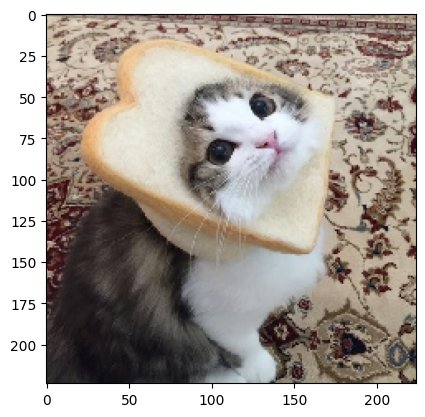

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0
A imagem é de um gato


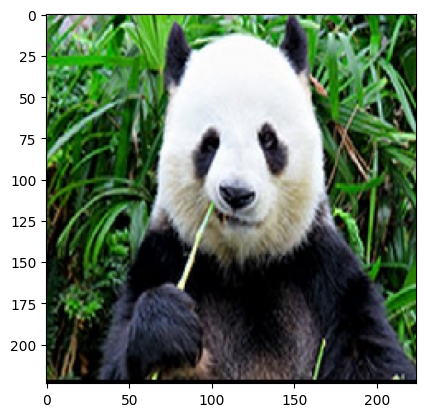

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
2
A imagem é de um panda


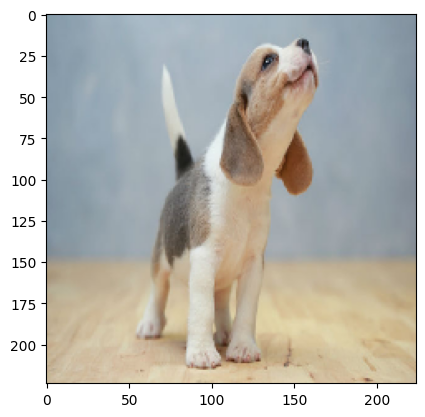

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1
A imagem é de um cachorro


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

test_images_path = '/content/animals/images'

image_files = os.listdir(test_images_path)

for img_file in image_files:

    img_path = os.path.join(test_images_path, img_file)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.show()


    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)


    img_array = preprocess_input(img_array)
    predictions = model_vgg.predict(img_array)


    predicted_class = np.argmax(predictions)

    print(predicted_class)
    if predicted_class == 0:
      print('A imagem é de um gato')
    elif predicted_class == 1:
      print('A imagem é de um cachorro')
    else:
      print('A imagem é de um panda')




Observa-se que, o primeiro modelo acertou apenas 2 das 3 previsões nas imagens de teste.
Por outro lado, o segundo modelo (VGG 16) apresentou uma performance satisfatória, acertando todas as previsões.

Verificando o impacto da regularização no primeiro modelo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,117,571 (19.52 MB)

 Trainable params: 5,117,571 (19.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 416s 5s/step - accuracy: 0.3918 - loss: 1.1923 - val_accuracy: 0.5083 - val_loss: 1.0462
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 373s 5s/step - accuracy: 0.5456 - loss: 0.9249 - val_accuracy: 0.5233 - val_loss: 0.9775
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 377s 5s/step - accuracy: 0.5487 - loss: 0.8708 - val_accuracy: 0.5667 - val_loss: 0.8290
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.5621 - loss: 0.8684 - val_accuracy: 0.5033 - val_loss: 1.1115
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 383s 5s/step - accuracy: 0.5708 - loss: 0.8112 - val_accuracy: 0.6400 - val_loss: 0.7039
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 373s 5s/step - accuracy: 0.6046 - loss: 0.7894 - val_accuracy: 0.6500 - val_loss: 0.7032
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 382s 5s/step - accuracy: 0.6256 - loss: 0.7559 - val_accuracy: 0.6683 - val_loss: 0.6890
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 390s 5s/step - accuracy: 0.6324 - loss: 0.7664 - val_accuracy: 0.6700 - v

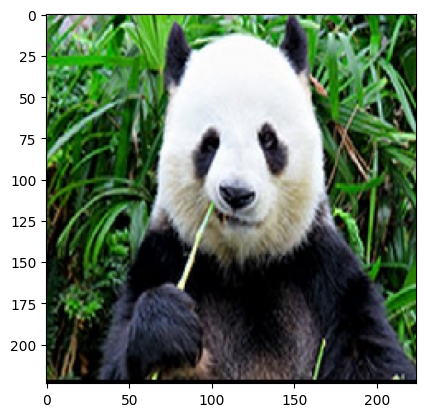

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
A imagem é de um panda


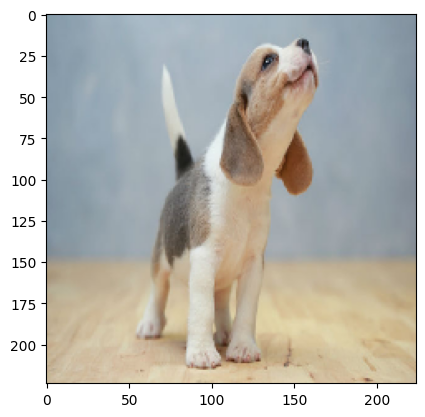

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
A imagem é de um cachorro


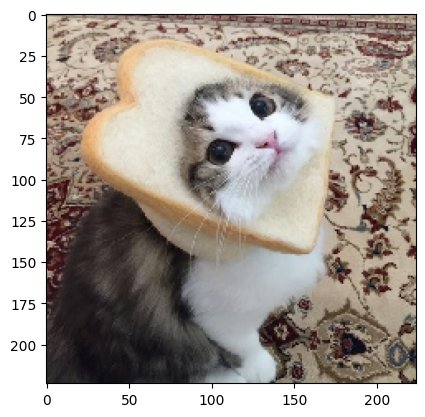

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
A imagem é de um panda


In [ ]:
#Estruturando o novo modelo com regularização
model_2 = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l2(1e-5)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l2(1e-5)),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_regularizer =tf.keras.regularizers.l2(1e-5)),
    layers.Dense(64, activation='relu',kernel_regularizer =tf.keras.regularizers.l2(1e-5)),
    layers.Dense(32, activation='relu',kernel_regularizer =tf.keras.regularizers.l2(1e-5)),
    layers.Dense(3, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

model_2.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

)
test_images_with_model(model_2, test_images_path)